In [1]:
import os
import pandas as pd
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import keras
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('test.csv').fillna(0).drop(columns=['date_id', 'is_scored'])
data

,D1,D2,D3,D4,D5,D6,D7,D8,D9,E1,...,V3,V4,V5,V6,V7,V8,V9,lagged_forward_returns,lagged_risk_free_rate,lagged_market_forward_excess_returns
0,0,0,0,0,1,0,0,1,0,1.577651,...,0.892196,0.828042,0.999172,0.759921,-0.803127,0.170966,-0.751909,0.003541,0.000161,0.003068
1,0,0,0,0,1,0,0,1,0,1.575182,...,0.699074,0.831349,1.120336,0.556217,-0.686192,0.141865,-0.660326,-0.005964,0.000162,-0.006437
2,0,0,0,0,1,0,0,0,1,1.572720,...,0.647487,0.832672,1.088992,0.665344,-0.459367,0.199405,-0.510979,-0.007410,0.000160,-0.007882
3,0,0,0,0,1,0,0,0,1,1.570266,...,0.445767,0.835979,1.040988,0.594577,-0.561643,0.161706,-0.575997,0.005420,0.000160,0.004949
4,0,0,0,0,0,0,1,0,1,1.567818,...,0.707672,0.839947,0.944593,0.715608,-0.692649,0.124669,-0.654045,0.008357,0.000159,0.007887
5,0,0,0,0,0,0,0,0,0,1.565379,...,0.469577,0.837963,1.226772,0.822751,-0.707361,0.142857,-0.649616,-0.002896,0.000159,-0.003365
6,0,0,0,0,0,0,0,0,0,1.562946,...,0.671958,0.837963,0.785877,0.805556,-0.715692,0.196098,-0.668289,0.002457,0.000155,0.001990
7,0,0,1,0,0,0,0,0,0,1.560520,...,0.481481,0.787698,0.834898,0.823413,-0.723949,0.133929,-0.670946,0.002312,0.000156,0.001845
8,0,0,0,0,0,0,0,0,0,1.558102,...,0.655423,0.783730,0.994026,0.851852,-0.684937,0.101852,-0.646265,0.002891,0.000156,0.002424
9,0,0,0,0,0,0,0,0,0,1.555690,...,0.066799,0.783730,1.068037,0.879630,-0.764806,0.079034,-0.705662,0.008310,0.000156,0.007843


In [3]:
y = np.where(data['lagged_market_forward_excess_returns'].shift(1) > 0, 2.0, 0.0)
y


array([0., 2., 0., 0., 2., 2., 0., 2., 2., 2.])

In [4]:
X = data.drop(columns=['lagged_market_forward_excess_returns'])
X

,D1,D2,D3,D4,D5,D6,D7,D8,D9,E1,...,V2,V3,V4,V5,V6,V7,V8,V9,lagged_forward_returns,lagged_risk_free_rate
0,0,0,0,0,1,0,0,1,0,1.577651,...,0.882937,0.892196,0.828042,0.999172,0.759921,-0.803127,0.170966,-0.751909,0.003541,0.000161
1,0,0,0,0,1,0,0,1,0,1.575182,...,0.863757,0.699074,0.831349,1.120336,0.556217,-0.686192,0.141865,-0.660326,-0.005964,0.000162
2,0,0,0,0,1,0,0,0,1,1.572720,...,0.848545,0.647487,0.832672,1.088992,0.665344,-0.459367,0.199405,-0.510979,-0.007410,0.000160
3,0,0,0,0,1,0,0,0,1,1.570266,...,0.826058,0.445767,0.835979,1.040988,0.594577,-0.561643,0.161706,-0.575997,0.005420,0.000160
4,0,0,0,0,0,0,1,0,1,1.567818,...,0.807540,0.707672,0.839947,0.944593,0.715608,-0.692649,0.124669,-0.654045,0.008357,0.000159
5,0,0,0,0,0,0,0,0,0,1.565379,...,0.785053,0.469577,0.837963,1.226772,0.822751,-0.707361,0.142857,-0.649616,-0.002896,0.000159
6,0,0,0,0,0,0,0,0,0,1.562946,...,0.767857,0.671958,0.837963,0.785877,0.805556,-0.715692,0.196098,-0.668289,0.002457,0.000155
7,0,0,1,0,0,0,0,0,0,1.560520,...,0.734127,0.481481,0.787698,0.834898,0.823413,-0.723949,0.133929,-0.670946,0.002312,0.000156
8,0,0,0,0,0,0,0,0,0,1.558102,...,0.695106,0.655423,0.783730,0.994026,0.851852,-0.684937,0.101852,-0.646265,0.002891,0.000156
9,0,0,0,0,0,0,0,0,0,1.555690,...,0.663360,0.066799,0.783730,1.068037,0.879630,-0.764806,0.079034,-0.705662,0.008310,0.000156


In [5]:
models = []
for file in os.listdir('.models'):
    if file.startswith('v16'):
        model = keras.saving.load_model(f'.models/{file}')
        models.append(model)

I0000 00:00:1759270337.486480   26918 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1201 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1759270337.486826   26918 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 4591 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1660 SUPER, pci bus id: 0000:06:00.0, compute capability: 7.5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


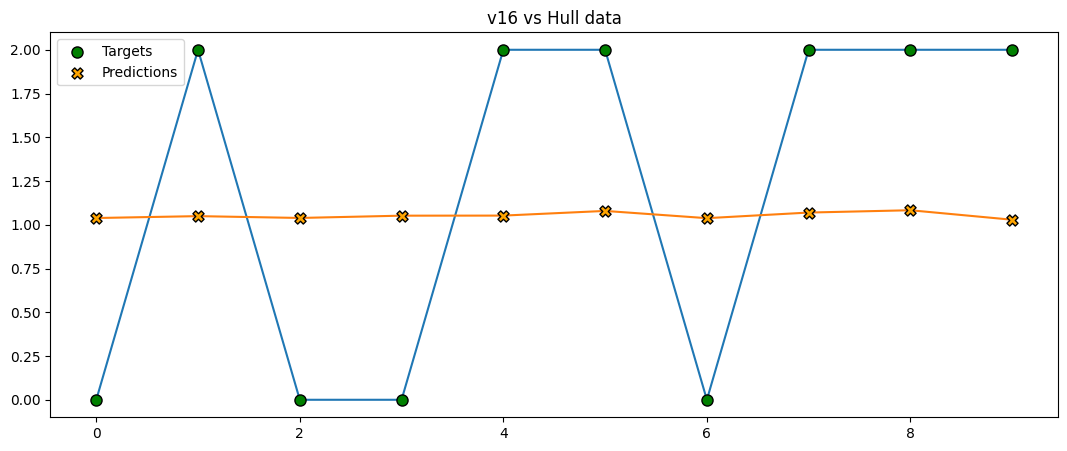

In [16]:
for model in models:
    plt.figure(figsize=(13, 5))
    plt.title(f'{model.name} vs Hull data')
    plt.plot(X.index, y, zorder=-1)
    plt.scatter(X.index, y, label='Targets', edgecolors='k', c='g', s=64)
    predictions = model.predict(X)
    plt.plot(X.index, predictions, zorder=-1)
    plt.scatter(X.index, predictions, label='Predictions', marker='X', edgecolors='k', c='orange', s=64)
    plt.legend()

In [7]:
for model in models:
    print(model.predict(X)[-1][0].item())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1.0288077592849731
